# Algonaut Project:   Humans vs Vehicles

This page was
built for a project at [NeuroMatch Academy](https://portal.neuromatchacademy.org/).

## Groupname
   **Scholarly-Bears/Jaces**

## Contributors:
- Jon McGill
- Atharva Kand
- Ceri Ngai
- Ernest Kirubakaran

## Group TA
Tanya Rubinstein

## Project TA
Mo Shahdloo

## Project Mentor
Andrey Chetverikov

## Project Proposal Link
- [Google Docs](https://docs.google.com/document/d/1KMcoqIicDDi2zRdMfMPdClroXQhrDjfQ1lNIeIGjK9M/edit)
- [Slides](https://docs.google.com/presentation/d/1DAwRs5ButlI7zlsJmpT6YlRSQ-YjDh4CB3Cbhat95xs/edit#slide=id.ge51dc41796_2_83)

## Algonauts2021:

- [Github](https://github.com/Neural-Dynamics-of-Visual-Cognition-FUB/Algonauts2021_devkit)

- [Research](https://arxiv.org/abs/2104.13714v1)

- [Google Colab](https://colab.research.google.com/drive/1FljzKYPtE5sYoSHQ4g02re3iruEPI0Vz?usp=sharing#scrollTo=PL_VxeyuoeKu)

## Other Science links:
- [Brainviewer](https://gallantlab.org/brainviewer/huthetal2012/)
   
- [Semantic space (objects vs humans)](https://www.cell.com/neuron/fulltext/S0896-6273(12)00934-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0896627312009348%3Fshowall%3Dtrue)

## Data/Statistical analysis techniques:

- [Searchlight](https://nilearn.github.io/auto_examples/02_decoding/plot_haxby_searchlight.html)

- [PCA](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)



**Keywords:** video stimuli, brain responses, algonauts dataset, voxel activity

    
    

## TODO List
- [ ] Create Contents
- [ ] Thumbnails for videos
- [ ] Other document additions, more theory for presentation day
- [ ] Searchlight implementation explanation
- [ ] Data Visualization and Analysis
- [ ] Conclusions
- [ ] What are the limitations and future directions? 
- [ ] PowerPoint presentation/slides

## Contents

1. [Project Section]()
2. [Abstract]()
3.
4.
5.


## Scientific Questions


Can we predict the human brain’s response to various video stimuli? 
Can we build a model of voxel activity in the human brain’s response to various video stimuli?
How are these different categories represented in the brain? 
    Semantic selectivity
    Animate vs inanimate categories represented in the same way/recognised differently
    Are there different areas in the brain that are responsible for this


## What is the phenomena? 

Humans are usually able to differentiate between animate and inanimate objects, e.g. human versus vehicles, in everyday life. 

## What was our hypothesis?

That humans and vehicles have separate pipelines (a chain of brain regions)  for processing:

So for all videos H (human) and video V (vehicle), examine the voxels in each brain region, to determine if there is a statistically significant dissimilarity, hypothesiing that yes there are.  And we can visualize the results:

- V1 
- V2
- V3
- V4
- **LOC**
- **EBA**
- **FFA**
- **STS**
- PPA

## Abstract
Humans are usually able to differentiate between animate and inanimate objects, e.g. human versus vehicles, in everyday life. Previous research has proposed different ways through which categorical perception may be represented in the brain, for instance in specific cortical areas or organised within a continuous semantic space wherein semantically similar categories are represented in nearby points in the cortex. This project investigates the organisation of this semantic space through the specific example of humans versus vehicles using voxelwise models. We hypothesise that visual stimuli containing humans (i.e. an animate object) and vehicles (i.e. an inanimate object) are represented in different areas of the brain. Here we use the Algonauts 2021 fMRI dataset to find brain regions that have active voxels given different video stimuli of humans and vehicles. The voxel activity for a given stimulus is then mapped on to the corresponding brain region. We expect to see higher dissimilarities in brain activations when comparing human-to-vehicle stimuli than when comparing human-to-human stimuli. This will be reflected in higher regions of the visual system as opposed to the primary visual cortex. The results will contribute to our existing understanding of the ways in which visual 
information is represented in the human brain. 

## How did your model work?
We calculate a Representational Dissimilarity Matrix(RDM) for the two categories (here humans vs. vehicles) against each other and subsequently perform Respresentational Similarity Analysis (RSA) of the computed RDM against voxel activations within the brain. The output correlation for a given stimulus is then mapped on to the corresponding brain region. 

## Implementation
Python/Jupyter Notebook
Code starts below, starting with python imports.

In [1]:
import os
import pandas as pd
import nibabel as nib
import pickle
import neurora
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_classif

import nilearn.decoding
from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMasker
from nilearn import image
from nilearn.image import new_img_like, load_img, get_data
from nilearn.image import index_img
from nilearn.plotting import plot_stat_map, plot_img, show


C:\Users\McGill\anaconda3\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## fMRI Data
The Algonauts dataset provides human brain responses to a set of 1,102 3-s long video clips of everyday events. The brain responses are measured with functional magnetic resonance imaging (fMRI). fMRI is a widely used brain imaging technique with high spatial resolution that measures blood flow changes associated with neural responses.

The training set consists of 1,000 video clips and the associated brain responses. The brain responses are provided here in two tracks corresponding to two independent tracks in the Algonauts challenge.

In the **full track**, brain responses provided are from selected voxels across the whole brain showing reliable responses to videos. The figure below shows the reliability values of different voxels in the brain.

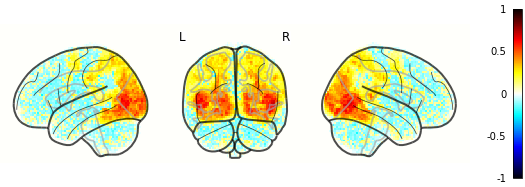

In the **mini track**, brain responses provided are from a set of specific regions of interest (ROIs) known to play a key role in visual perception. These ROIs start in early and mid-level visual cortex (V1, V2, V3, and V4) and extend into higher-level cortex that responds preferentially to all objects or particular categories (Body- EBA; Face - FFA, STS; Object - LOC; Scene - PPA). In the figure below we show the masks of the above mentioned ROIs for an example subject.


### Regions of Interest (ROIs)
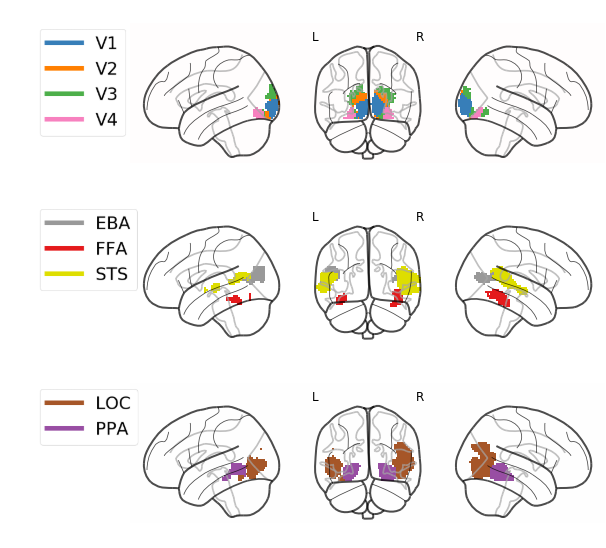

In [2]:
rois = ["V1", "V2", "V3", "V4","LOC", "EBA", "FFA","STS", "PPA"]

### Downloading/Loading the Algonauts / fMRI data
The trainig dataset contains 1,000 3-second videos + fMRI human brain data of 10 subjects in response to viewing videos from this set. 

The ROI data is provided for 9 ROIs of the visual brain (V1, V2, V3, V4, LOC, EBA, FFA, STS, PPA) in a Pickle file (e.g. V1.pkl) that contains a num_videos x num_repetitions x num_voxels matrix. For each ROI, we selected voxels that showed significant split-half reliability.

The whole brain data is provided for selected voxels across the whole brain showing reliable responses to videos in a Pickle file (e.g. WB.pkl) that contains a num_videos x num_repetitions x num_voxels matrix.



In [3]:
print("Make sure you have the Algonauts2021_devkit data in the current dir: ", os.getcwd())
os.chdir("Algonauts2021_devkit")
ids = os.listdir("content/AlgonautsVideos268_All_30fpsmax")

Make sure you have the Algonauts2021_devkit data in the current dir:  D:\NMA\algonaut


In [4]:
df = pd.DataFrame({"ID": ids})
df.head()
df["labels"] = None
df.head()
df.columns = ["vid_name", "labels"]
df.head()
df["id"] = df["vid_name"].apply(lambda x: x.split("_")[0])
df.head()
df = df[["vid_name", "id", "labels"]]
df.head()

,vid_name,id,labels
0,0001_0-0-1-6-7-2-8-0-17500167280.mp4,0001,None
1,0002_0-0-4-3146384004.mp4,0002,None
2,0003_0-0-8-1-2-4-0-0-3500812400.mp4,0003,None
3,0004_0-1-2-9-1-9-9-5-2401291995.mp4,0004,None
4,0005_0-1-7-8-3-6-4-8-4401783648.mp4,0005,None


[TODO] Could we get a snapshot of thumbnails of the videos we are using to represent humans and the thumbnails of videos representing vehicles?

In [5]:
df.to_csv("data.csv", index=False)

In [6]:
def load_dict(filename_):
    with open(filename_, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        ret_di = u.load()
        #print(p)
        #ret_di = pickle.load(f)
    return ret_di

def save_dict(di_, filename_):
    with open(filename_, 'wb') as f:
        pickle.dump(di_, f)

## Representational dissimilarity matrix (RDM)


To quantify the correlation of voxel data, we begin by computing the **representational dissimilarity matrix (RDM)** for the voxel for a subject sub/roi data and the ground truth (ids). This matrix, which we'll call $\mathbf{M}$, is computed as one minus the correlation coefficients between population responses to each stimulus. We can efficiently compute this by using the $z$-scored responses. 

The $z$-scored response of all neurons $\mathbf{r}$ to stimulus $s$ is the response mean-subtracted across neurons $i$ and normalized to standard deviation 1 across neurons $i$ where $N$ is the total number of neurons:

\begin{equation}
  \mathbf{z}^{(s)} = \frac{\mathbf{r}^{(s)} - \mu^{(s)}}
  {\sigma^{(s)}}
\end{equation}

where $\mu^{(s)} = \frac{1}{N}\sum_{i=1}^N r_i^{(s)}$ and 
$\sigma^{(s)} = \sqrt{\frac{1}{N}\sum_{i=1}^N \left( r_i^{(s)} - \mu^{(s)} \right)^2}$.

Then the full matrix can be computed as:
\begin{gather}
  \mathbf{M} = 1 - \frac{1}{N} \mathbf{ZZ}^T \\
\end{gather}
where $\mathbf{Z}$ is the z-scored response matrix with rows $\mathbf{r}^{(s)}$ and N is the number of neurons (or units). 


In [7]:
def correlate_rdms(rdm1, rdm2):
    """Correlate off-diagonal elements of two RDM's

    Args:
    rdm1 (np.ndarray): S x S representational dissimilarity matrix
    rdm2 (np.ndarray): S x S representational dissimilarity matrix to
      correlate with rdm1

    Returns:
    float: correlation coefficient between the off-diagonal elements
      of rdm1 and rdm2

    """

    # Extract off-diagonal elements of each RDM
    ioffdiag = np.triu_indices(rdm1.shape[0], k=1)  # indices of off-diagonal elements
    rdm1_offdiag = rdm1[ioffdiag]
    rdm2_offdiag = rdm2[ioffdiag]

    corr_coef = np.corrcoef(rdm1_offdiag, rdm2_offdiag)[0,1]

    return corr_coef

## Determining representation similarity

To quantify how similar the representations are, we can simply correlate their dissimilarity matrices. For this, we'll again use the correlation coefficient. Note that dissimilarity matrices are symmetric ($M_{ss'} = M_{s's}$), so we should only use the off-diagonal terms on one side of the diagonal when computing this correlation to avoid overcounting. Moreover, we should leave out the diagonal terms, which are always equal to 0, so will always be perfectly correlated across any pair of RDM's.

In [8]:
def rsa(roi, sub, rdm, ids):
    """
    Function to calculate the correlation between two RDMs
    Input:
        roi: region of interest (one of the 9 in Algonauts dataset)
        sub: one of sub01 to sub10
        rdm: ground truth RDM 
        ids: List of video ids included in the ground truth
    Output:
        correlation between the RDMs
    """
    # Define the data path
    path = f"participants_data_v2021/mini_track/{sub}/{roi}.pkl"
    # Load the activations
    activations = load_dict(path)
    # Filter activations based on ids
    activations = activations["train"][ids,:,:]
    # Take the mean across 3 trials
    activations = activations.mean(axis=1)
    # Normalize the activations
    sc = StandardScaler()
    activations = sc.fit_transform(activations)
    # Calculate the activation RDM matrix
    M = 1 - (activations @ activations.T)/(activations.shape[1])
    return correlate_rdms(rdm, M)

## Conditional RTM

- *ground truth* list of videos having only vehicles
- *ground truth* list of videos having only humans

In [9]:
vehicles = [12, 25, 134, 143, 415, 583, 648, 716, 725, 811, 819, 840, 849, 852, 864, 890, 930, 931, 956, 969, 971, 980, 985]

humans = [2,3,4,5,6,7,8,41,42,43,44,45,58,59,60,61,62,65,66,67,68,69,90,91,92]

#combined list
ids = vehicles + humans
vids = [f"vid_{str(i)}" for i in ids]
#aligned indices 0 - 999 instead of 1-1000
ids_ = [i-1 for i in ids]

Create ground truth RDM matrix (human vs vehicle videos)

In [10]:
final_list = []
for v1 in ids:
    v_list = []
    for v2 in ids:
        if v1 in humans:
            if v2 in humans:
                v_list.append(0)
            else:
                v_list.append(1)
        else:
            if v2 in vehicles:
                v_list.append(0)
            else:
                v_list.append(1)
    final_list.append(v_list)
 

# Parse the data  (pd is pickle data)

rdm = pd.DataFrame(final_list, columns = vids, index = vids)
rdm.to_csv("rdm.csv")

rdm = np.array(rdm)

Helper function for printing the correlations
highlight correlations > 0.23 (hyperparameter)

In [11]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

high_corr = 0.23 #gets bold and blue

def display_subject_correlation(videolist):
    for subjectid in range(10):
        if subjectid == 9:
            sub = "sub10"
        else:
            sub = "sub0" + str(subjectid+1)
        print("Subject: ", sub)
        for roi in rois:
            corr_ = rsa(roi, sub, rdm, videolist)  # this is the computational part
            if (corr_ > high_corr):
                print(color.BOLD + color.BLUE + f"ROI: {roi}, Correlation: {corr_}" + color.END)
            else:
                print(f"ROI: {roi}, Correlation: {corr_}")
    return

### Compute and Display
RSA for vehicles+humans (using the ids_ list) 

In [13]:
os.chdir("content")

display_subject_correlation(ids_) 

Subject:  sub01
ROI: V1, Correlation: -0.0018660620262965146
ROI: V2, Correlation: 0.027555093986119873
ROI: V3, Correlation: 0.04020593085626145
ROI: V4, Correlation: -0.0012096297334322063
ROI: LOC, Correlation: 0.29562387427451514
ROI: EBA, Correlation: 0.34889767361441176
ROI: FFA, Correlation: 0.33659741119825304
ROI: STS, Correlation: 0.20500200239110222
ROI: PPA, Correlation: 0.11993398558374624
Subject:  sub02
ROI: V1, Correlation: 0.04461014089602567
ROI: V2, Correlation: 0.020141928278775246
ROI: V3, Correlation: 0.07465611174570382
ROI: V4, Correlation: -0.009393506041163423
ROI: LOC, Correlation: 0.20390818028696386
ROI: EBA, Correlation: 0.43162337396534917
ROI: FFA, Correlation: 0.26613552430361215
ROI: STS, Correlation: 0.16081010506618956
ROI: PPA, Correlation: 0.05796937702365453
Subject:  sub03
ROI: V1, Correlation: 0.036021999404769404
ROI: V2, Correlation: 0.02202306523571848
ROI: V3, Correlation: 0.004611957364683688
ROI: V4, Correlation: 0.029785737423367493
ROI: 

## Sanity Check
To verify that the abive correlations are not an artifact of the analysis, try doing the same correlation but on every odd and even video in all 10 subjects and all roi.  The expectation is that the correlation will be much lower than above.

In [14]:
# sanity checking by using every other vid
# Condition RTM
max_vids = len(ids) #1000
evens = []
odds = []
# Create list of videos having odd and even index 
#odds = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,21,23,25,27,28,31,33,35,37,39,41,43,45,47,49]
#evens = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38,40,42,44,46]
for i in range (max_vids):
    if (i % 2 == 0):
        evens.append(i)
    else:
        odds.append(i)
#print(odds)
#print(evens)

testids = odds + evens
vids = [f"vid_{str(i)}" for i in ids]

# Create ground truch RDM matrix
test_list = []
for v1 in testids:
    vt_list = []
    for v2 in ids:
        if v1 in odds:
            if v2 in odds:
                vt_list.append(0)
            else:
                vt_list.append(1)
        else:
            if v2 in evens:
                vt_list.append(0)
            else:
                vt_list.append(1)
    test_list.append(vt_list)

rdm = pd.DataFrame(test_list, columns = vids, index = vids)
rdm.to_csv("rdm_test.csv")

sanity = [i-1 for i in testids]

rois = ["V1", "V2", "V3", "V4","LOC", "EBA", "FFA","STS", "PPA"]

rdm = np.array(rdm)

print("Sanity check for even and odd vids")

display_subject_correlation(sanity)


Sanity check for even and odd vids
Subject:  sub01
ROI: V1, Correlation: -0.010989701350115783
ROI: V2, Correlation: 0.001342936400417333
ROI: V3, Correlation: 0.013676358852366316
ROI: V4, Correlation: -0.004041290258971894
ROI: LOC, Correlation: 0.022999595505527087
ROI: EBA, Correlation: 0.018920390726881432
ROI: FFA, Correlation: -0.03692101059247694
ROI: STS, Correlation: -0.011471941224584272
ROI: PPA, Correlation: 0.0072193353633897735
Subject:  sub02
ROI: V1, Correlation: 0.010733528272114356
ROI: V2, Correlation: -0.010476575975842511
ROI: V3, Correlation: 0.007560497658859997
ROI: V4, Correlation: 0.02119283787587509
ROI: LOC, Correlation: 0.012386315249038944
ROI: EBA, Correlation: 0.02032516028913604
ROI: FFA, Correlation: 0.004404622477672726
ROI: STS, Correlation: 0.0028574685464562493
ROI: PPA, Correlation: 0.009188741293998097
Subject:  sub03
ROI: V1, Correlation: -0.01760804024638084
ROI: V2, Correlation: -0.021833763974693044
ROI: V3, Correlation: -0.02008678536505595

## Searchlighting and Visualizing the Data

[Searchlight](https://nilearn.github.io/auto_examples/02_decoding/plot_haxby_searchlight.html)
and visualize the fmri data

### Load Haxby dataset
[TODO] Say something about the below code 


In [15]:
haxby_dataset = datasets.fetch_haxby()

print('Anatomical nifti image (3D) is located at: %s' % haxby_dataset.mask)
print('Functional nifti image (4D) is located at: %s' % haxby_dataset.func[0])


fmri_filename = haxby_dataset.func[0]
haxby_dataset.func

labels = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
y = labels['labels']
session = labels['chunks']

haxby_dataset.session_target
labels

labels["chunks"].unique()

labels["chunks"].value_counts()

labels["labels"].value_counts()

Anatomical nifti image (3D) is located at: C:\Users\McGill/nilearn_data\haxby2001\mask.nii.gz
Functional nifti image (4D) is located at: C:\Users\McGill/nilearn_data\haxby2001\subj2\bold.nii.gz


rest            588
bottle          108
shoe            108
scissors        108
scrambledpix    108
house           108
chair           108
cat             108
face            108
Name: labels, dtype: int64

## Restrict to humans and vehicles



In [16]:
condition_mask = y.isin(['face', 'object']) #can we replace y.isin(['face', 'house']) # ?

fmri_img = index_img(fmri_filename, condition_mask)
y, session = y[condition_mask], session[condition_mask]

mask_img = load_img(haxby_dataset.mask)

# .astype() makes a copy.
process_mask = get_data(mask_img).astype(np.int64)
picked_slice = 29
process_mask[..., (picked_slice + 1):] = 0
process_mask[..., :picked_slice] = 0
process_mask[:, 30:] = 0
process_mask_img = new_img_like(mask_img, process_mask)

haxby_dataset.mask

mask_img

n_jobs = 1

### KFold
Define the cross-validation scheme used for validation.
Here we use a KFold cross-validation on the session, which corresponds to
splitting the samples in 4 folds and make 4 runs using each fold as a test
set once and the others as learning sets

In [17]:
cv = KFold(n_splits=4)

### Searchlighting
The radius of the Searchlight sphere that will scan the volume is 5.6

In [23]:
def callSearchlight():
    searchlight = nilearn.decoding.SearchLight(
                    mask_img,
                    radius=5.6, n_jobs=n_jobs,
                    verbose=1, cv=cv)
    searchlight.fit(fmri_img, y)
    nifti_masker = NiftiMasker(mask_img=mask_img, runs=session,
                           standardize=True, memory='nilearn_cache',
                           memory_level=1)
    fmri_masked = nifti_masker.fit_transform(fmri_img)

    f_values, p_values = f_classif(fmri_masked, y)
    p_values = -np.log10(p_values)
    p_values[p_values > 10] = 10
    p_unmasked = get_data(nifti_masker.inverse_transform(p_values))
    
    mean_fmri = image.mean_img(fmri_img)

    searchlight_img = new_img_like(mean_fmri, searchlight.scores_)
    return

For decoding, standardizing is often very important

### Plotting
Because scores are not a zero-centered test statistic, we cannot use plot_stat_map


In [ ]:
def plotSearch():
    plot_img(searchlight_img, bg_img=mean_fmri,
         title="Searchlight", display_mode="z", cut_coords=[-9],
         vmin=.42, cmap='hot', threshold=.2, black_bg=True)
    return

### F-score
F_score results

In [ ]:
def F_score():
    p_ma = np.ma.array(p_unmasked, mask=np.logical_not(process_mask))
    f_score_img = new_img_like(mean_fmri, p_ma)
    plot_stat_map(f_score_img, mean_fmri,
              title="F-scores", display_mode="z",
              cut_coords=[-9],
              colorbar=False)

    show()
    return

In [24]:
#[TODO] needs to be debugged
#callSearchLight()
#plotSearch()
#F_score()
#fmri_img.shape
#y

## Data visualization
[TODO] Say something about the below code 

In [25]:
def get_fmri(fmri_dir, ROI):
    """This function loads fMRI data into a numpy array for to a given ROI.
    Parameters
    ----------
    fmri_dir : str
        path to fMRI data.
    ROI : str
        name of ROI.
    Returns
    -------
    np.array
        matrix of dimensions #train_vids x #repetitions x #voxels
        containing fMRI responses to train videos of a given ROI
    """


    # Loading ROI data
    ROI_file = f"{fmri_dir}/{ROI}.pkl"
    ROI_data = load_dict(ROI_file)

    # averaging ROI data across repetitions
    ROI_data_train = np.mean(ROI_data["train"], axis = 1)
    if ROI == "WB":
        voxel_mask = ROI_data['voxel_mask']
        return ROI_data_train, voxel_mask

    return ROI_data_train

def saveasnii(brain_mask,nii_save_path,nii_data):
    img = nib.load(brain_mask)
    nii_img = nib.Nifti1Image(nii_data, img.affine, img.header)
    nib.save(nii_img, nii_save_path)
    return

In [26]:
def visualize_activity(vid_id,sub):
    # Setting up the paths for whole brain data
    fmri_dir = f"participants_data_v2021/full_track/{sub}/"
    #directories
    #result directory to store nifti file
    resultsdir = ".."
    brain_mask = f"../example.nii"
    nii_save_path = f"/vid_activity.nii" #os.path.join(results_dir, 'vid_activity.nii')
    path = f"participants_data_v2021/full_track/{sub}/WB.pkl"
    ROI_data = load_dict(path)
    # averaging ROI data across repetitions
    fmri_train_all = np.mean(ROI_data["train"], axis = 1)
    voxel_mask = ROI_data['voxel_mask']
    # mapping the data to voxels and storing in a nifti file
    visual_mask_3D = np.zeros((78,93,71))
    visual_mask_3D[voxel_mask==1]= fmri_train_all[vid_id,:] 
    print(type(visual_mask_3D))
    saveasnii(brain_mask,nii_save_path,visual_mask_3D)

    # visualizing saved nifti file
    plotting.plot_glass_brain(nii_save_path,
                          title='fMRI response',plot_abs=False,
                          display_mode='lyr',colorbar=True)
    return

Make sure you have the nii files in the current dir:  D:\NMA\algonaut\Algonauts2021_devkit\content
<class 'numpy.ndarray'>


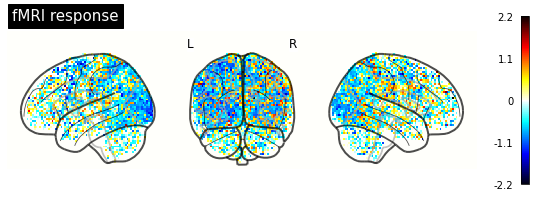

In [27]:
print("Make sure you have the nii files in the current dir: ", os.getcwd())
#0os.chdir("Algonauts2021_devkit")
#ids = os.listdir("content/AlgonautsVideos268_All_30fpsmax")
visualize_activity(12, 'sub01')

<class 'numpy.ndarray'>


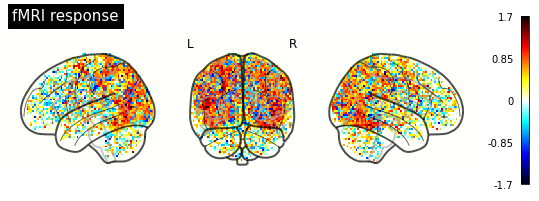

In [28]:
visualize_activity(2, 'sub01')

In [ ]:
def process_algonauts(vid_ids,sub):
    max_visualizations = 5
    i = 0
    for vid in vid_ids:
        visualize_activity(vid, sub)
        i = i + 1
        if (i > max_visualizations):
            return
    return

In [ ]:
#visualize_activity(83,'sub08')
#visualize_activity(2, 'sub01')
process_algonauts(ids, 'sub01')

condition_mask = [1]*48

fmri_filename = './vid_activity.nii'
fmri_img_ = load_img(fmri_filename_)
nii_data = fmri_img_.get_data()
#fmri_img = index_img(fmri_filename, condition_mask)

#fmri_img = load_img(fmri_filename)
np.unique(nii_data).shape
nii_unique = list(np.unique(nii_data))
nii_dict = {j:i for i,j in enumerate(nii_unique)}
nii_file_ = np.vectorize(nii_dict.get)(nii_data)

In [ ]:
y = ["vehicle"] * 23 + ["human"] * 25

In [ ]:
#path = f"participants_data_v2021/full_track/{sub}/WB.pkl"
path = "participants_data_v2021/full_track/sub01/WB.pkl"
s1 = load_dict(path)

mask_img = s1["voxel_mask"]

mask_img = mask_img.astype(int)

brain_mask = '../example.nii'
saveasnii(brain_mask, './mask8_face_vt.nii', mask_img)

In [ ]:
mask_img = load_img('./mask.nii')

In [ ]:
n_jobs = 1

# Define the cross-validation scheme used for validation.
# Here we use a KFold cross-validation on the session, which corresponds to
# splitting the samples in 4 folds and make 4 runs using each fold as a test
# set once and the others as learning sets
cv = KFold(n_splits=4)

# The radius is the one of the Searchlight sphere that will scan the volume
searchlight = nilearn.decoding.SearchLight(
    mask_img,
    radius=5.6, n_jobs=n_jobs,
    verbose=1, cv=cv)
searchlight.fit(fmri_img, y)

In [ ]:
mask_img.get_data().sum()

mask_img = load_img(haxby_dataset.mask)

mask_img.get_data().sum()

mask_img.shape

np.nonzero()

In [ ]:
sphere_radius = 2

centers = []
def extract_sphere(data, center, sphere_radius):
    return data[center[0]-sphere_radius : center[0]+sphere_radius+1, center[1]-sphere_radius : center[1]+sphere_radius+1, center[2]-sphere_radius : center[2]+sphere_radius+1 ]

for x in range(sphere_radius, (mask_dims[0]-sphere_radius)):
    for y in range(sphere_radius, (mask_dims[1]-sphere_radius)):
        for z in range(sphere_radius,(mask_dims[2]-sphere_radius)):
            if np.any(extract_sphere(mask,[x,y,z], sphere_radius)==0):
                continue
            else:
                centers.append([x,y,z])

## Conclusions
[TODO]
Rough Draft
We hypothesized that visual stimuli containing humans (i.e. animate objects/people) and vehicles (i.e.  inanimate objects) will be perceived similarly, starting in the visual cortex, but distinguished from one another in some deeper area of the brain. Using RSA and searchlight analysis, .... [TODO] finish this paragraph.

## Limitations and Future Directions
- List of Limitations
With this paper, we focused mainly on the what question of is there a difference in the fMRI data for subjects when shown videos of people vs videos of vehicles.  This is a fairly narrow question, so it may be difficult to draw broader conclusions from this research.  How questions like, how does the brain absorb that visual information and produce these differing patterns in it's higher regions?  Also, why questions such as those discussed below would need further research. 
- List of Future Directions and Elaboration of these ideas
1. Semantic Priming
There is a concept in psychology called semantic priming, where a person's psychology is affected in subtle ways by being exposed to certain words before some other psychological experiment.  For example, Daniel Ariely (need a citation) has done research on cheating, and has done psychological experiments where he exposed the subjects to items like the 10 commandments before testing whether people will cheat.  One ideas for future research would be to rerun such experiments and measuring the brain to see if you can correlate the semantic priming with fMRI (or other brain measurements) to see if one can add insight into such experiments in a tangible way.  In other words, can you "see" semantic priming happening in the brain. And also, can you use that insight to draw conclusions that couldn't otherwise be made?
2. Cognition and evolution of the Human Brain
To give a scale of perceptive cognition in the line of evolutionary brain development, we have on the one hand non-human primates, and other mammals who have varying degrees of cognitive power.  Whereas, humans can distinguish animate vs inanimate objects (humans vs vehicles), dogs cannot even tell that a vacuum cleaner isn’t an animate object. Above dogs, on this cognitive scale, would be other primates, but somewhere along the line of evolution humans also  learned to recognize themselves in a mirror (self-awareness).  Other primates are unable to do this. Elephants  and dolphins can match this level of cognition, but can we pinpoint the differences in brains which are self aware vs brains that are not able to recognize themselves in the mirror?  To get a better understanding of the mechanism of cognition, it would be good to understand how visual perception in the brain really works.  